In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read File

In [2]:
df = pd.read_csv('stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Assesing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 12)

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
print(df[df['age'] < 1].shape[0])

43


## Cleaning Data

In [9]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [10]:
#cek missing value kembali
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#drop fitur ID
df.drop(['id'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [13]:
#Menghapus age < 1
df.drop(df[df['age'] < 1 ].index, inplace=True)

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000
mean,43.589059,0.098283,0.054470,106.241593,28.950760,0.049142
std,22.361959,0.297726,0.226965,45.394524,7.663173,0.216185
min,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,77.285000,23.900000,0.000000
50%,45.000000,0.000000,0.000000,91.890000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.125000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

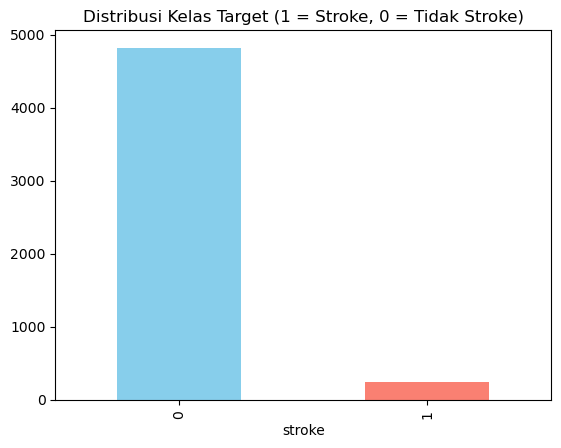

In [15]:
# Memeriksa distribusi target (apakah data seimbang)
df['stroke'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kelas Target (1 = Stroke, 0 = Tidak Stroke)')
plt.show()

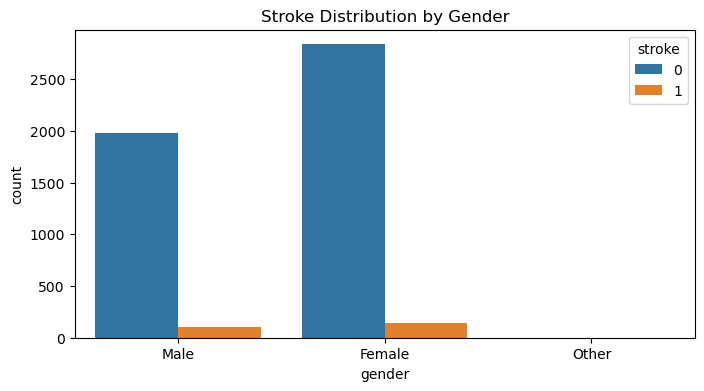

In [16]:
# Distribusi stroke berdasarkan jenis kelamin
plt.figure(figsize=(8, 4))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Distribution by Gender')
plt.show()

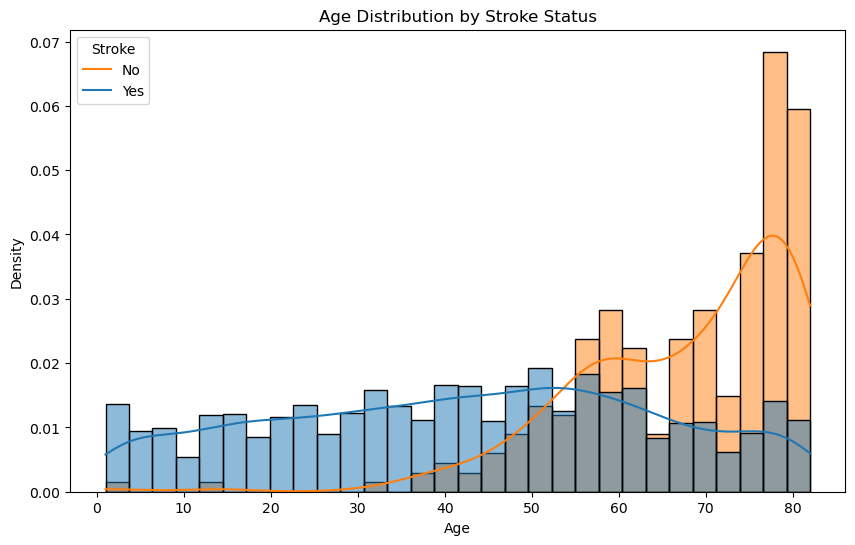

In [17]:
#Distribusi umur berdasarkan status stroke
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True, stat='density', common_norm=False)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

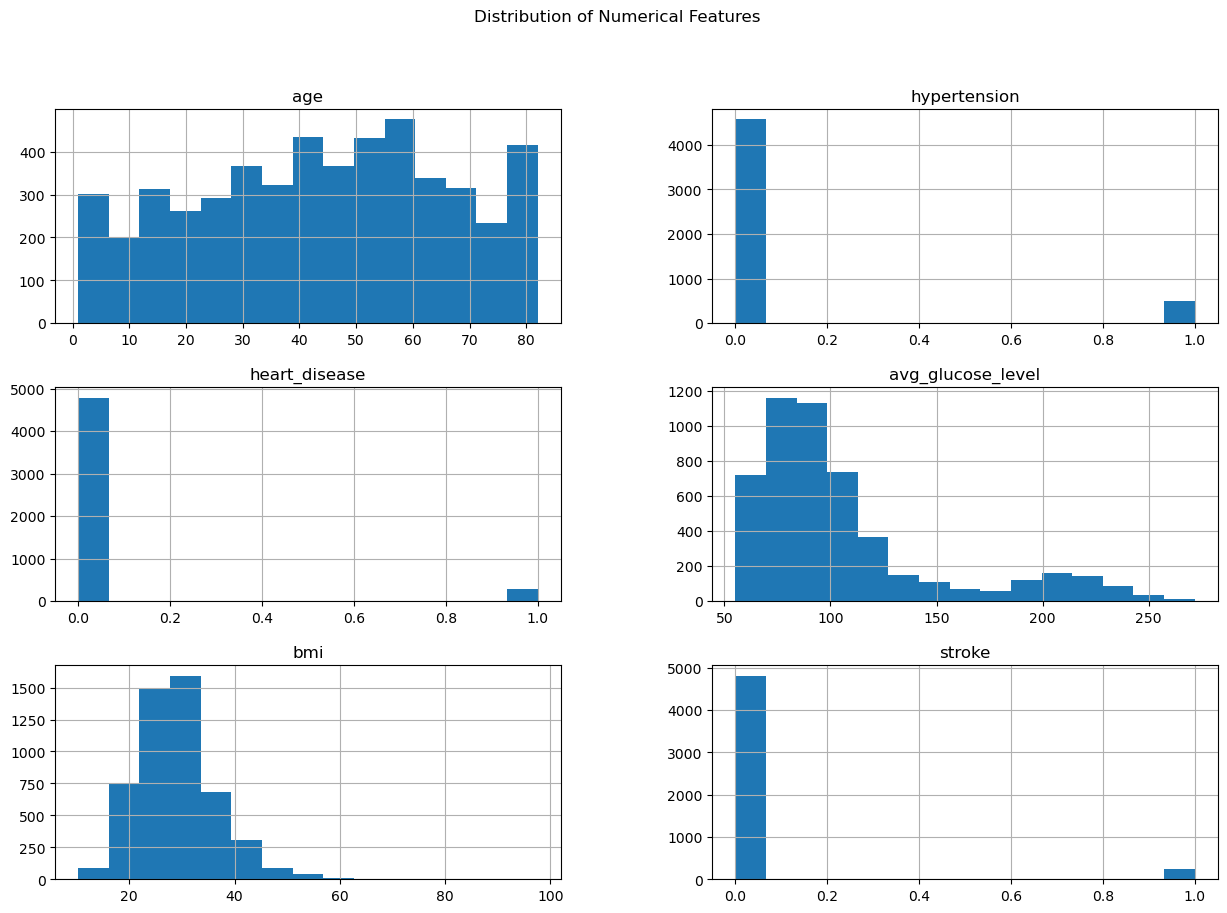

In [18]:
# Histogram untuk setiap fitur numerik
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

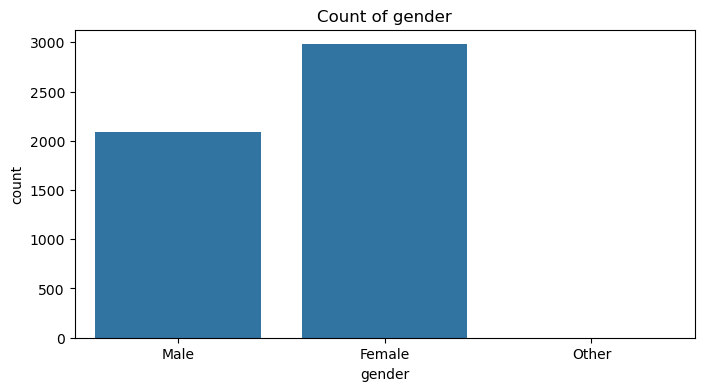

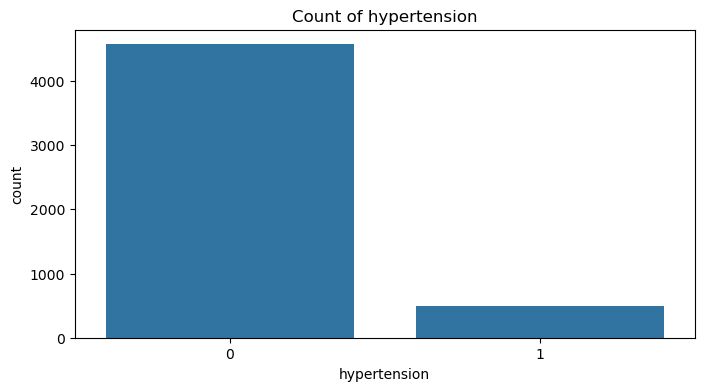

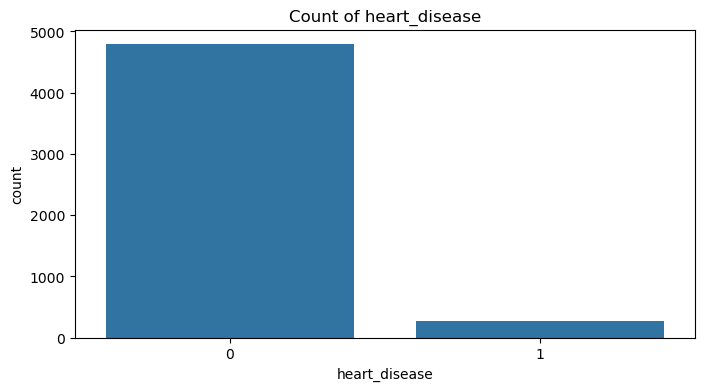

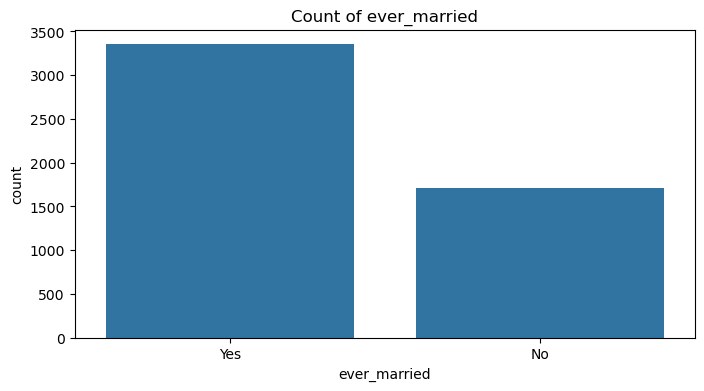

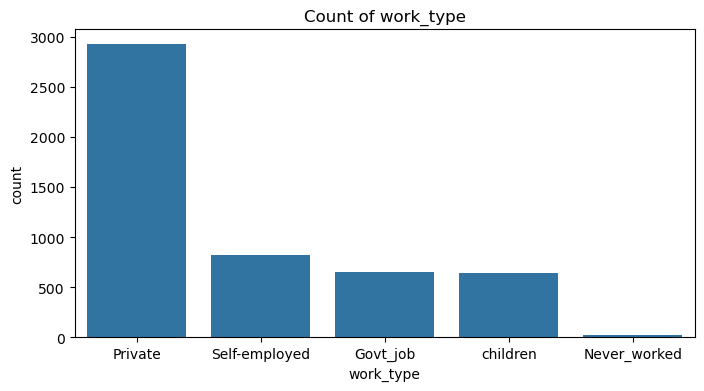

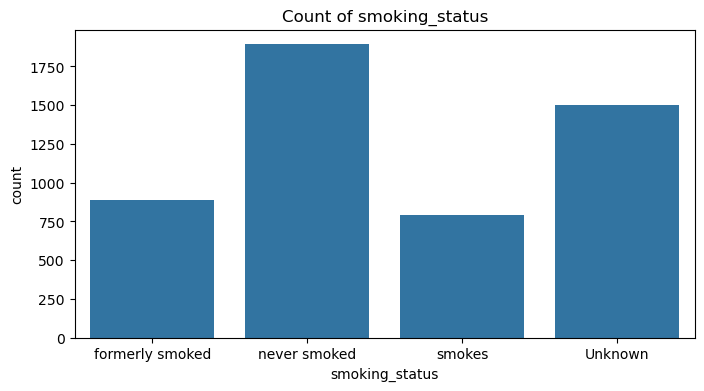

In [19]:
# Bar plot untuk fitur kategorikal
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.show()

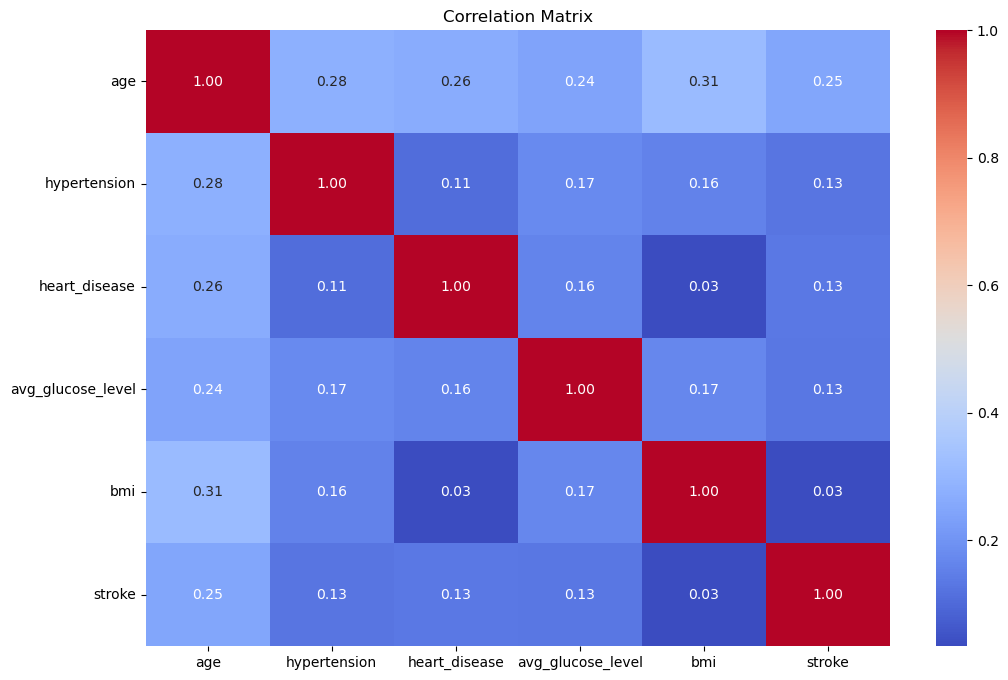

In [20]:
# Korelasi antara fitur numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()